In [6]:
%matplotlib inline 
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'retina' # I use a HiDPI screen

In [7]:
import numpy as np
import itertools
from subprocess import call
import matplotlib.pyplot as plt
import fishchips.camb

In [2]:
obs = fishchips.camb.CAMB_Observables(["omDRh2"], [1.35e-6], [5.6e-8], [2.2e-6],
                                      output_root = "spectra/new_ethos_a4",
                                     CAMB_directory="/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/",
                                     CAMB_executable="ethos_camb")

In [3]:
CAMB_template = {"omDRh2" : 1.35e-6}

# generate the fiducial cosmology
obs.compute_cosmo(key='CAMB_fiducial', CAMB_dict=CAMB_template, debug=True)

Calling CAMB.
b'(w0, wa) = (-1.00000,  0.00000)
 MODIFIED FOR INTERACTING DARK MATTER
 Only Available for Scalar Perturbations (so far)
Reion redshift       =   7.689
Om_b h^2             =  0.022370
Om_SIDM h^2          =  0.006000
Om_CDM h^2           =  0.114000
Om_nu h^2            =  0.000644
Om_Lambda            =  0.684809
Om_K                 =  0.000000
Om_m (1-Om_K-Om_L)   =  0.315191
100 theta (CosmoMC)  =  1.032696
Helium Fraction      =  0.245400
N_eff (total)        =  3.046000
 1 nu, g= 1.0153 m_nu*c^2/k_B/T_nu0=    355.92 (m_nu=  0.060 eV)
 DR Tight Coupling Switches off at tau =   0.50639195649257085     
 DM Tight Coupling Switches off at tau =    2.0445984787333189     
 Dark Radiation Decouples at tau       =    2.9329293185703613     
 Dark Matter Decouples at tau          =    7.5764199057684989     
Reion opt depth      =  0.0544
Age of universe/GYr  =  13.797
zstar                =  1090.02
r_s(zstar)/Mpc       =  143.26
100*theta            =  1.032814
zdrag   

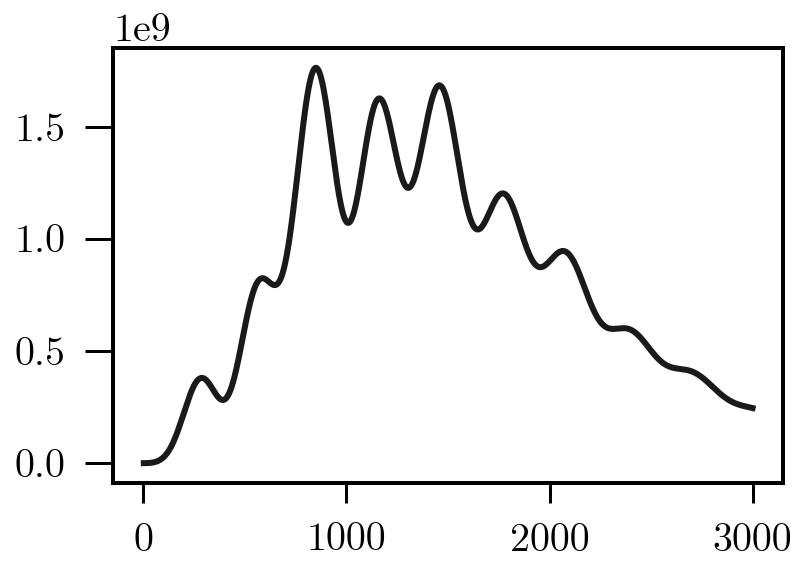

In [8]:
plt.plot( obs.cosmos['ell'], obs.cosmos['ell']**2 * obs.cosmos['tt'] )

In [4]:
from astropy.io import ascii
lensed = ascii.read("/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/spectra/new_ethos_a4_lensedCls.dat",
                  names= ["ell", "tt", "ee", "bb", "te"] )

In [10]:
lensed.

ell,tt,ee,bb,te
int64,float64,float64,float64,float64
2,1023.9,0.030359,1.6472e-06,2.6272
3,969.55,0.03899,3.2948e-06,2.9435
4,917.34,0.034222,5.4923e-06,2.7656
5,878.39,0.023405,8.2405e-06,2.3646
6,851.76,0.013498,1.154e-05,1.9164
7,834.72,0.0073649,1.5392e-05,1.5174
8,824.41,0.0045551,1.9797e-05,1.2101
9,819.45,0.0034918,2.4756e-05,0.99915
10,818.44,0.0029823,3.0271e-05,0.87609


In [12]:
ascii.read("/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/spectra/new_ethos_a4_lenspotentialCls.dat",
          names = ["ell", "tt", "ee", "bb", "te", "dd", "dT", "dE"])

ell,tt,ee,bb,te,dd,dT,dE
int64,float64,float64,float64,float64,float64,float64,float64
2,1023.9,0.030357,0.0,2.6272,5.009e-08,0.002988,-1.2109e-05
3,969.54,0.038987,0.0,2.9435,6.0887e-08,0.002985,-1.2942e-05
4,917.33,0.034217,0.0,2.7656,7.0091e-08,0.0029087,-1.0992e-05
5,878.38,0.023397,0.0,2.3646,7.8065e-08,0.0028065,-7.6425e-06
6,851.74,0.013486,0.0,1.9164,8.5013e-08,0.0026982,-4.0055e-06
7,834.69,0.0073495,0.0,1.5174,9.1121e-08,0.0025928,-8.6939e-07
8,824.37,0.0045353,0.0,1.2101,9.6519e-08,0.0024899,1.3009e-06
9,819.41,0.003467,0.0,0.99916,1.0132e-07,0.0023888,2.3384e-06
10,818.38,0.002952,0.0,0.8761,1.0559e-07,0.0022914,2.3781e-06


In [ ]:
call(["/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/ethos_camb", "params.ini"])

In [17]:
from subprocess import Popen, PIPE

process = Popen(['/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/ethos_camb',
                 'params.ini'], stdout=PIPE, stderr=PIPE, cwd="/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/")
stdout, stderr = process.communicate()

In [22]:
# ! cat /home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/params.ini

#output_root is prefixed to output file names
output_root = spectra/new_ethos_a4

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

#Parameters for CAMB with dark matter (DM) interacing with massless dark radiation (DR)
#See arXiv:1512.05344 for details

#The physical density of DR today (\omega_DR in 1512.05344)
# A rough conversion is \Delta N_eff = 3*omDRh2/1.68e-5, but careful since DR not free-streaming at early times
# ZL: Important parameter #1. Range: [5.6e-8,2.2e-6] which roughly corresponds to \Delta N_eff = [0.01,0.4]
omDRh2 =1.35e-6

#Maximum number of opacity coefficients provided
DM_DR_highest_n = 5

#Maximum number of angular coefficients provided
DM_DR_highest_l = 7

#List of a_n and b_n (in Mpc^{-1}) from n = 0 to n = DM_DR_highest_n
#Note that the exact values of a_n and b_n depend on your choice of z_D
# a_n are the DM-DR opacity coefficients
# 

In [5]:
ethos_dir = "/home/zequnl/Installs/franyancr-ethos_camb-3f4c02cd3668/"

In [13]:
import shutil
with open(ethos_dir + 'test.ini') as old, open('./newtest.ini', 'w') as new:
    for line in old:
        if "l_accuracy_boost" in line:
            new.write("CHANGED LINE\n")
        else:
            new.write(line)
# shutil.move('newtest', 'test')

In [14]:
! cat {ethos_dir}test.ini

#Larger to keep more terms in the hierarchy evolution. 
l_accuracy_boost        = 1

#Increase to use more C_l values for interpolation.
#Increasing a bit will improve the polarization accuracy at l up to 200 -
#interpolation errors may be up to 3%
#Decrease to speed up non-flat models a bit
l_sample_boost          = 1


In [15]:
! cat newtest.ini

#Larger to keep more terms in the hierarchy evolution. 
CHANGED LINE

#Increase to use more C_l values for interpolation.
#Increasing a bit will improve the polarization accuracy at l up to 200 -
#interpolation errors may be up to 3%
#Decrease to speed up non-flat models a bit
l_sample_boost          = 1


In [2]:
for i in {'1':20, '2':30}:
    print(i)

1
2
